# Shell Scripting/Data Gathering

In [105]:
# imports
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [88]:
# cuda script runner
def scriptRunner(n):
    cmd = f"echo " + str(n) + " | ./pr"
    res = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    
    data = res.stdout.split('\n')[0:2]

    return [n, [int(n) for n in data]]

In [109]:
# Generate Data
maxN = 65535
granularity = 50
nums = [n * (maxN // granularity) for n in range(granularity, 0, -1)]

data = []

for n in nums:
    data.append(scriptRunner(n))

print(data)

[[65500, [0, 16]], [64190, [0, 16]], [62880, [0, 17]], [61570, [0, 16]], [60260, [0, 17]], [58950, [0, 16]], [57640, [0, 16]], [56330, [0, 16]], [55020, [0, 16]], [53710, [0, 16]], [52400, [0, 16]], [51090, [0, 16]], [49780, [0, 17]], [48470, [0, 16]], [47160, [0, 16]], [45850, [0, 16]], [44540, [0, 16]], [43230, [0, 17]], [41920, [0, 16]], [40610, [0, 16]], [39300, [0, 16]], [37990, [0, 17]], [36680, [0, 16]], [35370, [0, 16]], [34060, [0, 16]], [32750, [0, 16]], [31440, [0, 16]], [30130, [0, 17]], [28820, [0, 16]], [27510, [0, 16]], [26200, [0, 17]], [24890, [0, 17]], [23580, [0, 16]], [22270, [0, 16]], [20960, [0, 16]], [19650, [0, 16]], [18340, [0, 16]], [17030, [0, 16]], [15720, [0, 17]], [14410, [0, 16]], [13100, [0, 16]], [11790, [0, 16]], [10480, [0, 16]], [9170, [0, 16]], [7860, [0, 16]], [6550, [0, 16]], [5240, [0, 16]], [3930, [0, 17]], [2620, [0, 16]], [1310, [0, 16]]]


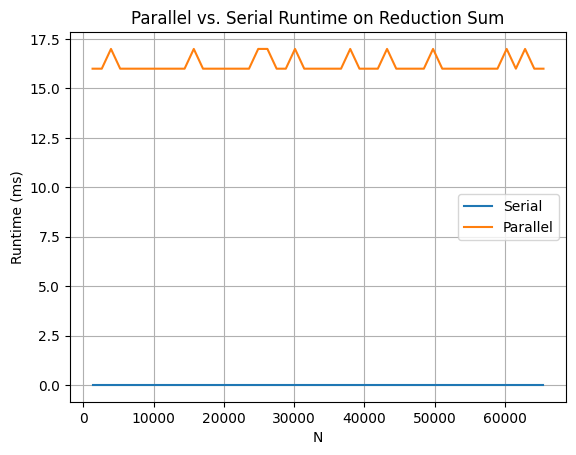

In [111]:
# Plot Data

x = [l[0] for l in data]
y = [l[1] for l in data]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='N', ylabel='Runtime (ms)',
       title='Parallel vs. Serial Runtime on Reduction Sum')
ax.grid()

plt.legend(["Serial", "Parallel"])

fig.savefig("runtime_plot_after_block_implementation.png")
plt.show()